In [1]:
import importlib

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

%matplotlib inline

In [2]:
model_module = importlib.import_module("handyrl.model")
env_module = importlib.import_module("handyrl.envs.kaggle.hungry_geese")

Loading environment football failed: No module named 'gfootball'


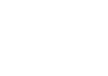

In [3]:
e = env_module.Environment()
e.reset()

In [4]:
obs = e.observation()
obs = torch.from_numpy(obs.reshape(1, 17, 7, 11)).clone()
obs_ = torch.cat([obs, obs], dim=0)
print(f"size: {obs_.size()}, type: {obs_.dtype}")

size: torch.Size([2, 17, 7, 11]), type: torch.float32


In [5]:
# plt.imshow(obs[0][0], cmap="gray")
# plt.show()

In [6]:
input_ = torch.randn(2, 17, 7, 11)
print(f"size: {input_.size()}, type: {input_.dtype}")

size: torch.Size([2, 17, 7, 11]), type: torch.float32


In [7]:
net = env_module.GeeseNet()

In [8]:
# Disable trainable for pretrained weights.
# for param in net.geese_net.parameters():
#     param.requires_grad = False

In [9]:
out = net(obs_)
# print(f"size: {out.size()}, type: {out.dtype}")
print(f"size: {out['policy'].size()}, type: {out['policy'].dtype}")
print(f"size: {out['value'].size()}, type: {out['value'].dtype}")

size: torch.Size([2, 4]), type: torch.float32
size: torch.Size([2, 1]), type: torch.float32


In [10]:
out

{'policy': tensor([[ 0.0934, -0.1449,  0.4198, -1.3498],
         [ 0.0934, -0.1449,  0.4198, -1.3498]], grad_fn=<AddmmBackward>),
 'value': tensor([[-0.1964],
         [-0.1964]], grad_fn=<TanhBackward>)}

In [11]:
# pytorch_total_params
params = sum(p.numel() for p in net.parameters())
print(f"{params:,}")

167,497


In [12]:
# pytorch_total_params (trainable)
params = sum(p.numel() for p in net.parameters() if p.requires_grad)
print(f"{params:,}")

167,497


In [13]:
net

GeeseNet(
  (conv0): TorusConv2d(
    (conv): Conv2d(17, 32, kernel_size=(3, 3), stride=(1, 1))
    (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (cnn_blocks1): ModuleList(
    (0): TorusConv2d(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): TorusConv2d(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): TorusConv2d(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (3): TorusConv2d(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (4): TorusConv2d(
      (conv): Conv2d(32